### Exercici 1
#### Agafa un conjunt de dades de tema esportiu que t'agradi

In [1]:
import numpy as np #library for scientific computing
import pandas as pd #library for dataframes 
import matplotlib.pyplot as plt #graphic library
import seaborn as sns #advanced graphic library based on matplotlib
import statistics #library for statistics
import warnings #library to manage warnings
import scipy #library with algorithms for statistics and scientific computing

warnings.filterwarnings('ignore')

In [2]:
#we obtain a dataset from Kaggle (https://www.kaggle.com/rajeevw/ufcdata)
#this dataset is about UFC-Fight historical data from 1993 to 2021. UFC is a Mixed Martial Arts USA league.

df_ufc = pd.read_csv('ufc.csv') 

df_ufc.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [3]:
print("Shape (rows x columns): " + str(df_ufc.shape))
print("Dimensions: " + str(df_ufc.ndim))
print("Columns: " + str(df_ufc.columns))
print('Nan values per variable:\n' + str(df_ufc.isna().sum()))

Shape (rows x columns): (6012, 144)
Dimensions: 2
Columns: Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD',
       ...
       'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age'],
      dtype='object', length=144)
Nan values per variable:
R_fighter         0
B_fighter         0
Referee          32
date              0
location          0
               ... 
R_Height_cms      4
R_Reach_cms     406
R_Weight_lbs      2
B_age           172
R_age            63
Length: 144, dtype: int64


In [4]:
print("Types of objects:\n" + str(df_ufc.dtypes))
#types of each variable

Types of objects:
R_fighter        object
B_fighter        object
Referee          object
date             object
location         object
                 ...   
R_Height_cms    float64
R_Reach_cms     float64
R_Weight_lbs    float64
B_age           float64
R_age           float64
Length: 144, dtype: object


Explanation of the dataframe:

Each observation represents a fight.

An R or a B before the description is refering to Red (R) or Blue (B) corner. 
Red corner usually is for the favorite fighter or with the most recognized name.
Blue corner usually is for the underdog or the less recognized name

#### Normalitza els atributs categòrics en dummy

In [5]:
#we are going to apply dummy variables for some features: Winner, title_bout and Stance

#these are the atributes and their values counting
print('Before aplying Dummy variables we have:','\n')
print('For atribute Winner:')
print(df_ufc['Winner'].value_counts(),'\n')
print('For atribute Stance:')
print(df_ufc['R_Stance'].value_counts(),'\n')
print('For atribute Title bout:')
print(df_ufc['title_bout'].value_counts(),'\n')

#for column winner and R_stance we can apply the get_dummies method
df_ufc_dummyWinner = pd.get_dummies(df_ufc['Winner'])
print('After aplying Dummy variables we have:','\n')
print(df_ufc_dummyWinner)

df_ufc_dummyStance = pd.get_dummies(df_ufc['R_Stance'])
print(df_ufc_dummyStance)

#for title_bout, it has only two bool values, true and false, we can do it by ourselves
#assigning 1 to True and 0 to false
    
df_ufc.loc[df_ufc['title_bout'] == True, 'title_bout'] = 1
df_ufc.loc[df_ufc['title_bout'] == False, 'title_bout'] = 0
print(df_ufc['title_bout'].value_counts())

Before aplying Dummy variables we have: 

For atribute Winner:
Red     3979
Blue    1923
Draw     110
Name: Winner, dtype: int64 

For atribute Stance:
Orthodox       4538
Southpaw       1231
Switch          197
Open Stance      15
Sideways          2
Name: R_Stance, dtype: int64 

For atribute Title bout:
False    5647
True      365
Name: title_bout, dtype: int64 

After aplying Dummy variables we have: 

      Blue  Draw  Red
0        0     0    1
1        0     0    1
2        0     0    1
3        1     0    0
4        1     0    0
...    ...   ...  ...
6007     0     0    1
6008     0     0    1
6009     0     0    1
6010     0     0    1
6011     0     0    1

[6012 rows x 3 columns]
      Open Stance  Orthodox  Sideways  Southpaw  Switch
0               0         1         0         0       0
1               0         1         0         0       0
2               0         0         0         1       0
3               0         0         0         0       1
4               0    

#### Estandaritza els atributs numèrics amb StandardScaler

Data standarized:
[[-0.99872471 -0.9999474 ]
 [ 0.40086898  0.44122805]
 [ 2.61222701  1.01769823]
 ...
 [ 1.10066583  0.44122805]
 [ 1.52054393  1.01769823]
 [ 1.10066583 -0.13524213]] 


Mean for weight and height:
1.7030318566819977e-16
-3.2452218157884735e-15

Std deviation for weight and height:
1.0
0.9999999999999997


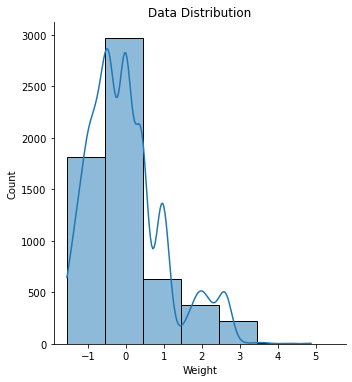

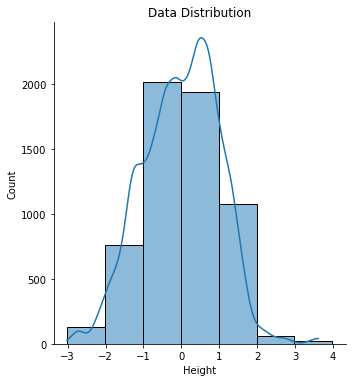

In [6]:
#first we install the Scikil Learn module
#conda install scikit-learn
#now we import the scikit library
from sklearn.preprocessing import StandardScaler

#now we can apply the StandardScaler function
#this method applies standardization to a numeric atribute, 
#centering data and standard deviation = 1

#removing nan data for columns that we will use
df_ufc = df_ufc[['R_Weight_lbs','R_Height_cms']].dropna()

#initializing the Scaler
scaler = StandardScaler()
#the fit method compute the mean and std
#the transform method performs standardization by centering and scaling
df_ufc_trans = scaler.fit_transform(df_ufc[['R_Weight_lbs','R_Height_cms']])

#it returns data transformed as a numpy array
print('Data standarized:')
print(df_ufc_trans,'\n')

#we check mean = 0 and standard deviation = 1
weight_trans = df_ufc_trans[:,0]
height_trans = df_ufc_trans[:,1]

print('\nMean for weight and height:')
print(np.mean(weight_trans))
print(np.mean(height_trans))

print('\nStd deviation for weight and height:')
print(np.var(weight_trans))
print(np.var(height_trans))

fig1 = sns.displot(data=weight_trans, kde=True, binwidth=1)
fig1.set(title='Data Distribution', xlabel='Weight', ylabel='Count')

fig2 = sns.displot(data=height_trans, kde=True, binwidth=1)
fig2.set(title='Data Distribution', xlabel='Height', ylabel='Count')

### Exercici 2
#### Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.

In [12]:
#PCA (Principal Component Analysis) is fundamentally a dimensionality reduction algorithm
#the main aim of PCA is to find principal components which can describe the data points
#PCA can also be used to filter noisy datasets, such as image compression. 
#The first principal component expresses the most amount of variance.

#we are going to apply PCA to reduce 6 dimensions to 2 dimensions
#features must be standarized before applying PCA

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

#importing dataset
df_ufc = pd.read_csv('ufc.csv') 

#removing nan data for columns we will use
df_ufc = df_ufc[['R_Reach_cms','R_Weight_lbs','R_Height_cms','B_Reach_cms','B_Weight_lbs','B_Height_cms']].dropna()

#initializing the Scaler
scaler = StandardScaler()

#the fit method computes the mean and standard deviation
#the transform method performs standardization by centering and scaling
df_ufc_std = scaler.fit_transform(df_ufc)
print('Data standarized:')
print(df_ufc_std,'\n')

#number of dimensions we want to reduce
pca = PCA(n_components=2)

PrincipalComponents = pca.fit_transform(df_ufc_std)
df_ufc_PDA = pd.DataFrame(data = PrincipalComponents, columns = ['principal component 1', 'principal component 2'])

print('Data reduced from 6 to 2 dimensions:')
print(df_ufc_PDA,'\n')

Data standarized:
[[-0.51995698 -0.95560419 -0.94287738 -1.26359262 -0.95287764 -1.55644944]
 [ 0.42805938  0.49322769  0.48272978  0.94240891  1.09916881  1.06095977]
 [ 0.66506348  2.78238205  1.05297264  0.69729763  2.15450699  1.06095977]
 ...
 [ 0.42805938  0.49322769  0.76785121  0.94240891  1.09916881  1.06095977]
 [ 0.42805938  0.49322769  0.48272978  0.45218635  1.09916881  0.18849004]
 [ 0.66506348  1.07276044  0.76785121  0.45218635  0.51286982  0.47931328]] 

Data reduced from 6 to 2 dimensions:
      principal component 1  principal component 2
0                 -2.526850               0.688564
1                  1.841197              -0.571812
2                  3.471220               0.097959
3                 -5.318523               0.792395
4                 -1.635520              -1.184832
...                     ...                    ...
4957              -0.374741              -0.150662
4958               1.882819               0.544796
4959               1.957523 

### Exercici 3
#### Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

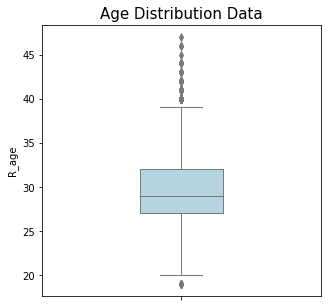

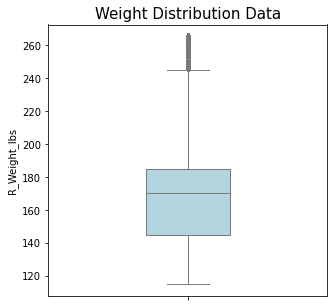

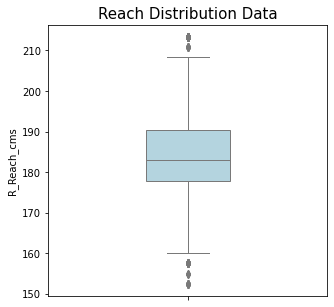

Data normalized:
[[0.28571429 0.13333333 0.41666667]
 [0.32142857 0.46666667 0.58333333]
 [0.32142857 0.99333333 0.625     ]
 ...
 [0.42857143 0.6        0.5       ]
 [0.39285714 0.6        0.5       ]
 [0.39285714 0.6        0.5       ]]
Mix and Max from Data normalized:
[0. 0. 0.]
[1. 1. 1.]


In [19]:
#Normalization is to rescale an input variable to the range between 0 and 1
#Normalization requires to know the minimum and maximum values for each attribute
#Normalization is a scaling technique that does not assume any specific distribution

#importing tool to apply normalization
from sklearn.preprocessing import MinMaxScaler

#importing dataset
df_ufc = pd.read_csv('ufc.csv')

#removing nan data for columns we will use
df_ufc = df_ufc[['R_age','R_Weight_lbs','R_Reach_cms']].dropna()

#checking outliers for these features
#outliers are close to normal data, it is not necessary to delete them
ax = plt.subplots(figsize=(5,5))
ax = sns.boxplot(y='R_age', data=df_ufc,  color='lightblue', fliersize=5, linewidth=1 , width=0.3);
ax.set_title("Age Distribution Data", fontsize=15)
plt.show()

ax = plt.subplots(figsize=(5,5))
ax = sns.boxplot(y='R_Weight_lbs', data=df_ufc,  color='lightblue', fliersize=5, linewidth=1 , width=0.3);
ax.set_title("Weight Distribution Data", fontsize=15)
plt.show()

ax = plt.subplots(figsize=(5,5))
ax = sns.boxplot(y='R_Reach_cms', data=df_ufc,  color='lightblue', fliersize=5, linewidth=1 , width=0.3);
ax.set_title("Reach Distribution Data", fontsize=15)
plt.show()

#we are going to normalize features age, weight and reach from the dataset
ufc_data = df_ufc[['R_age','R_Weight_lbs','R_Reach_cms']]

#initializing the Scaler
mms = MinMaxScaler()

#applying the normalization algorithm
ufc_data_normal = mms.fit_transform(ufc_data)

#checking data normalized and max and min values
print('Data normalized:')
print(ufc_data_normal)
print('Mix and Max from Normalized Data:')
print(ufc_data_normal.min(axis=0))
print(ufc_data_normal.max(axis=0))
